In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn import linear_model

In [2]:
fraud_df = pd.read_csv(r'Fraud_Data.csv')
ip_df = pd.read_csv(r'IpAddress_to_Country.csv')

In [3]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
ip_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [5]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [6]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


## Add country

In [7]:
country = []
for i in range(len(fraud_df)):
    ip = fraud_df.loc[i,'ip_address']
    tmp = ip_df[(ip_df['lower_bound_ip_address'] <= ip) & (ip_df['upper_bound_ip_address'] >= ip)]
    if len(tmp) ==1:
        country.append(tmp['country'].values[0])
    else:
        country.append('NA')
fraud_df['country']=country
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States


In [8]:
fraud_df.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


## EDA

##### signup_time and purchase_time

In [9]:
fraud_df['signup_time']= pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time']= pd.to_datetime(fraud_df['purchase_time'])

In [10]:
fraud_df['diff_min'] = (fraud_df.purchase_time - fraud_df.signup_time).dt.total_seconds()/60
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,diff_min
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,75111.366667
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,299.066667
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0.016667
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,8201.416667
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,72691.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,87687.216667
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,15521.166667
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,111360.266667
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,85768.650000


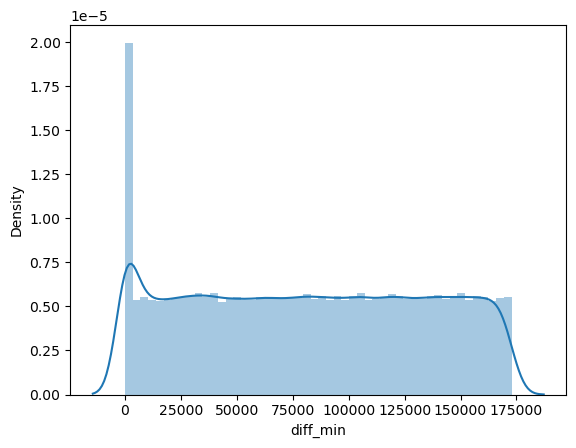

In [11]:
sns.distplot(fraud_df.diff_min)
plt.show()

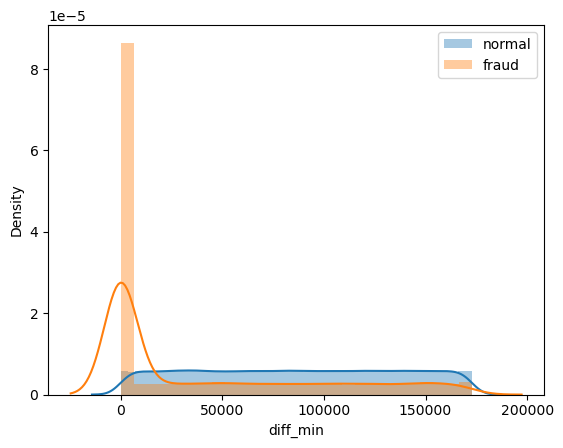

In [12]:
normal = fraud_df[fraud_df['class']==0]
fraud = fraud_df[fraud_df['class']==1]

sns.distplot(normal.diff_min, label='normal')
sns.distplot(fraud.diff_min, label='fraud')
plt.legend()
plt.show()

Most of fraud happened when the account sign-up

##### Age

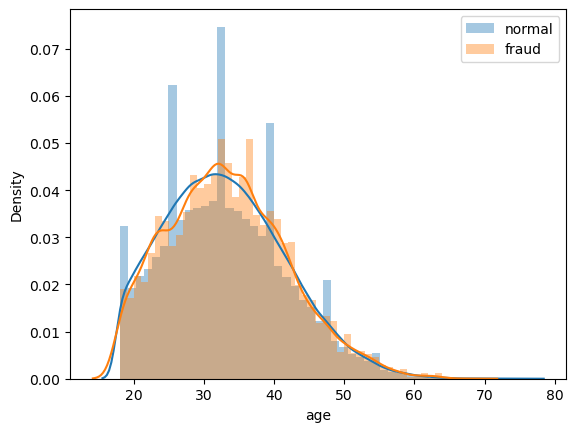

In [13]:
sns.distplot(normal.age, label='normal')
sns.distplot(fraud.age, label='fraud')
plt.legend()
plt.show()

##### purchase value

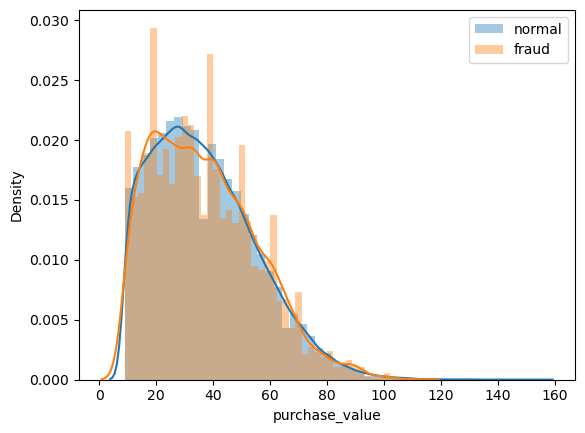

In [14]:
sns.distplot(normal.purchase_value, label='normal')
sns.distplot(fraud.purchase_value, label='fraud')
plt.legend()
plt.show()

##### device_id

In [15]:
count = fraud_df.groupby('device_id')['user_id'].count().reset_index()
count

,device_id,user_id
0,AAALBGNHHVMKG,1
1,AAAWIHVCQELTP,1
2,AAAXJHWCLISKY,1
3,AAAXXOZJRZRAO,11
4,AABFGRPBQHWFQ,1
...,...,...
137951,ZZZGSIJRNCXBJ,1
137952,ZZZIKLJSVSQMF,1
137953,ZZZKJIZHJEDFN,1
137954,ZZZMVOGBAJVTM,1


In [16]:
fraud_df = pd.merge(fraud_df, count, how = 'left', on = 'device_id')
fraud_df = fraud_df.rename(columns = {'user_id_y':'device_purchase','user_id_x':'user_id'})
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,diff_min,device_purchase
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,75111.366667,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,299.066667,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0.016667,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,8201.416667,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,72691.016667,1


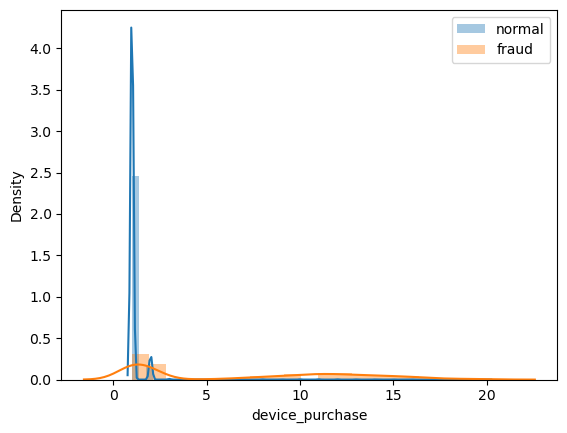

In [17]:
normal = fraud_df[fraud_df['class']==0]
fraud = fraud_df[fraud_df['class']==1]

sns.distplot(normal.device_purchase, label='normal')
sns.distplot(fraud.device_purchase, label='fraud')
plt.legend()
plt.show()

More transactions, more fraud

##### Categorical data

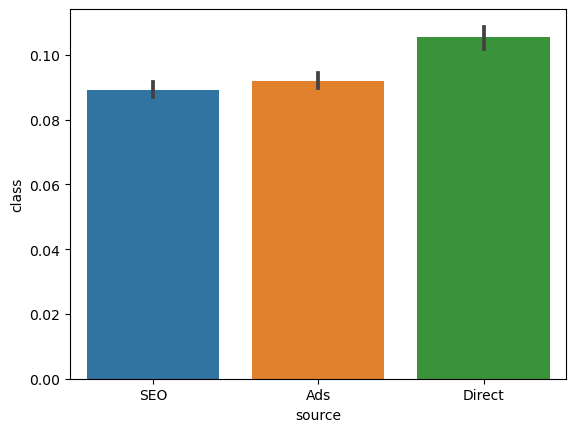

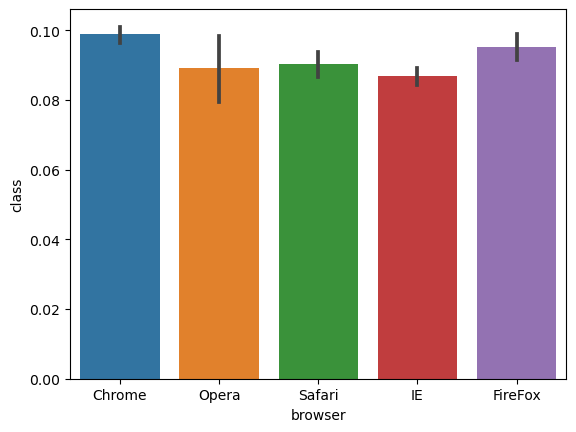

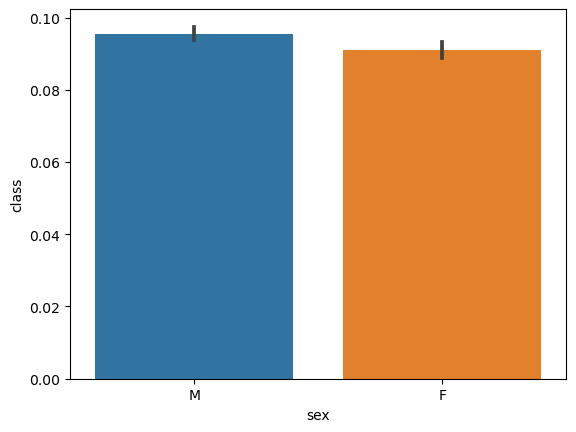

In [18]:
for col in ['source','browser','sex']:
    sns.barplot(x=col, y='class', data = fraud_df)
    plt.show()

Higher probability of fraud:
1. Source: Direct
2. browser: Chrome
3. sex: Male

In [19]:
country_info = pd.merge(fraud_df.groupby('country')['user_id'].count().reset_index(), fraud.groupby('country')['user_id'].count().reset_index(), how = 'left', on = 'country')
country_info.columns = ['country', 'count_country', 'count_country_fraud']
country_info['count_country_fraud'].fillna(0, inplace=True)
country_info['percentage'] = country_info['count_country_fraud']/country_info['count_country']
country_info.sort_values(by=['percentage'], ascending=False).head(10)


,country,count_country,count_country_fraud,percentage
167,Turkmenistan,1,1.0,1.000000
116,Namibia,23,10.0,0.434783
155,Sri Lanka,31,13.0,0.419355
98,Luxembourg,72,28.0,0.388889
178,Virgin Islands (U.S.),3,1.0,0.333333
51,Ecuador,106,28.0,0.264151
165,Tunisia,118,31.0,0.262712
132,Peru,119,31.0,0.260504
20,Bolivia,53,13.0,0.245283
89,Kuwait,90,21.0,0.233333


In [20]:
country_info.sort_values(by=['count_country'], ascending=False).head(10)

,country,count_country,count_country_fraud,percentage
172,United States,58049,5551.0,0.095626
115,NA,21966,1883.0,0.085723
36,China,12038,1043.0,0.086642
84,Japan,7306,715.0,0.097865
171,United Kingdom,4490,477.0,0.106236
88,Korea Republic of,4162,380.0,0.091302
64,Germany,3646,262.0,0.071860
60,France,3161,300.0,0.094907
32,Canada,2975,348.0,0.116975
24,Brazil,2961,270.0,0.091185


### Logistic regression

In [21]:
df = fraud_df.copy()
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,diff_min,device_purchase
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,75111.366667,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,299.066667,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0.016667,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,8201.416667,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,72691.016667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,87687.216667,2
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,15521.166667,1
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,111360.266667,1
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,85768.650000,2


In [22]:
df = df.drop(['signup_time','purchase_time','device_id','ip_address'], axis=1)

In [23]:
df = pd.get_dummies(df)

In [24]:
num_data = df[["purchase_value","age",'diff_min','device_purchase']]
scaler = MinMaxScaler(feature_range=(0, 1)).fit(num_data)
scaled_data = scaler.transform(num_data)
scaled_df = pd.DataFrame(scaled_data, columns=["purchase_value","age",'diff_min','device_purchase'])
scaled_df = scaled_df.reset_index(drop=True)
scaled_df.head()

,purchase_value,age,diff_min,device_purchase
0,0.172414,0.362069,0.434673,0.000000
1,0.048276,0.603448,0.001731,0.000000
2,0.041379,0.603448,0.000000,0.578947
3,0.241379,0.396552,0.047462,0.000000
4,0.206897,0.465517,0.420667,0.000000


In [25]:
X,y=df.drop('user_id',axis=1),df['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105778, 197) (45334, 197) (105778,) (45334,)


In [26]:
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = logistic_regr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
s = logistic_regr.score(X_test,y_test)
print(s)

0.9523536418582079


### Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[40914   203]
 [ 1957  2260]]


There are 40914+2260 correct prediction

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     41117
           1       0.92      0.54      0.68      4217

    accuracy                           0.95     45334
   macro avg       0.94      0.77      0.83     45334
weighted avg       0.95      0.95      0.95     45334



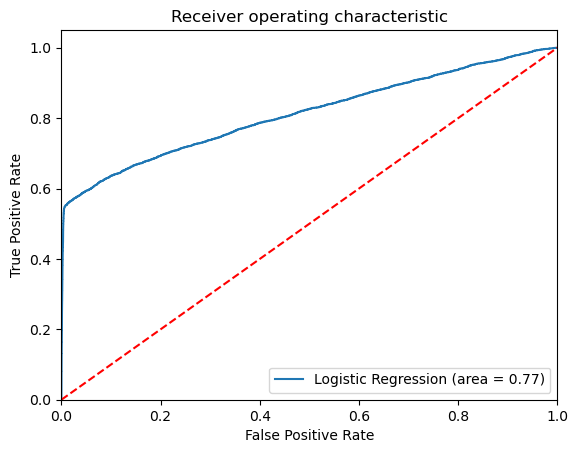

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()